In [8]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Now we will merge our data files for 12 months
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] ## ignore hidden files

all_months_data = pd.DataFrame() ## creating an empty dataframe

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

In [10]:
# Reading the updated dataframe
all_data=pd.read_csv("all_data_copy.csv")
all_data ## final dataset


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [13]:
# Let us see if our dataset contains any missing value
pd.isna(all_data).sum() ## there are missing values

# Let us remove rows consisting missing values
all_data=all_data.dropna(how="all") # we will drop rows where all entries are nan
all_data.isna().sum() # missing values are removed

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [17]:
# Deleting those rows consisting "Or" in Order Date column and then we will create Month column
all_data=all_data[all_data["Order Date"].str[0:2]!="Or"]
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32') ## we are making Month as integer
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [18]:
# Q1) What was the best month for sales? How much was earned thst month?
## We will need a Sales column for each month.
all_data["Quantity Ordered"]=all_data["Quantity Ordered"].astype("int32") ## since quantity and Price both are objects here, we will transform their data types
all_data["Price Each"]=all_data["Price Each"].astype("float")
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [23]:
## Let us add Sales column now
all_data["Sales"]=all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [24]:
month_sales=all_data.groupby(["Month"],as_index=True).sum() ## transforming the dataset by grouping the months so that we can get total sales correspnding to each month.
month_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


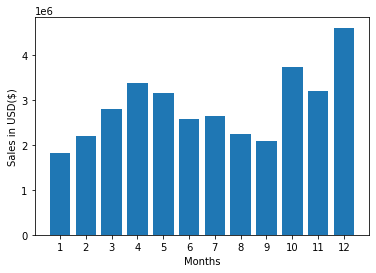

In [25]:
## Let us visualize to answer Q1
month=range(1,13)
plt.bar(month,month_sales["Sales"])
plt.xticks(month)
plt.xlabel("Months")
plt.ylabel("Sales in USD($)")
plt.show() 
## December had the highest sales. December is full of holidays and kind of festive time in US, Christmas is there. Lots of people buy gifts.

In [26]:
# Q2) Which city sold the most products?
## We need to add City column
all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(",")[1]) ## splitting each entry of Purchase Address and then we are picking up the cities
all_data.head()
city_sales=all_data.groupby(["City"],as_index=False).sum() ## grouping by cities to get total quantity sold for each location
city_sales

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta,16602,2.779908e+06,104794,2.795499e+06
1,Austin,11153,1.809874e+06,69829,1.819582e+06
2,Boston,22528,3.637410e+06,141112,3.661642e+06
3,Dallas,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles,33289,5.421435e+06,208325,5.452571e+06
5,New York City,27932,4.635371e+06,175741,4.664317e+06
6,Portland,14053,2.307747e+06,87765,2.320491e+06
7,San Francisco,50239,8.211462e+06,315520,8.262204e+06
8,Seattle,16553,2.733296e+06,104941,2.747755e+06


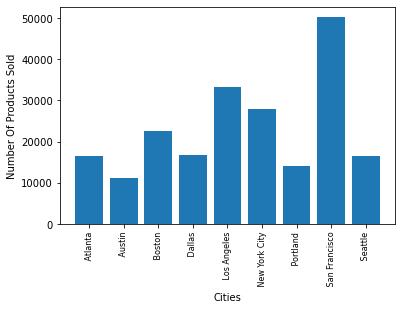

In [27]:
## Now we will be visualizing
cities=city_sales["City"]
plt.bar(cities,city_sales["Quantity Ordered"])
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel("Cities")
plt.ylabel("Number Of Products Sold")
plt.show() 
## San Francisco had sold the most electronic products. Maybe silicon valley or tech city needs more electronics or people have more money there.

In [28]:
# Q3) What time should we display advertisement to maximize the likelihood of purchases
## Let us add Hour column and we will see at which time the purchases are more
all_data["Hour"]=pd.to_datetime(all_data["Order Date"]).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


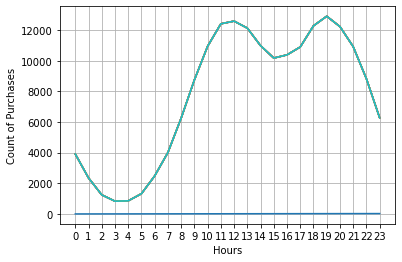

In [30]:
## Visualization
hour_count=all_data.groupby(["Hour"],as_index=False).count()
hours=hour_count["Hour"]
plt.plot(hours,hour_count)
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Count of Purchases")
plt.grid()
plt.show() 
## peak points are at 12 pm and 7 pm. Purchases are high in the intervals 11 am-12 pm and in 6 pm-8 pm, mostly when people are done with house chores or lunch break and back from their work.

In [31]:
# Q4) Which products are mostly sold together?
## We will look for duplicate values in Order ID column as those products will be ordered at the same time from the same place.
order_dup=all_data[all_data["Order ID"].duplicated(keep=False)] ## dataset consisting duplicate Order IDs
order_dup["Grouped"]=order_dup.groupby(["Order ID"])["Product"].transform(lambda x: ','.join(x)) ## we are joining the products having same Order Ids
order_group=order_dup[["Order ID","Grouped"]].drop_duplicates()
order_group.head()

<ipython-input-31-e56275c7afc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_dup["Grouped"]=order_dup.groupby(["Order ID"])["Product"].transform(lambda x: ','.join(x)) ## we are joining the products having same Order Ids


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
## Now we will check it by a frequency table
pd.crosstab(index=order_group["Grouped"],columns="count").sort_values(by="count",ascending=False) 
## iPhone,Lightning Charging Cable are sold together most of the time, followed by Google Phone, USB-C Charging Cable.

col_0,count
Grouped,
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303
...,...
"LG Dryer,27in FHD Monitor",1
"LG Dryer,27in 4K Gaming Monitor",1
"Google Phone,Wired Headphones,USB-C Charging Cable",1


In [35]:
# Q5) What product was sold the most? Why do you think that?
product_count=all_data.groupby(["Product"],as_index=False)["Quantity Ordered"].sum()
product_count

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


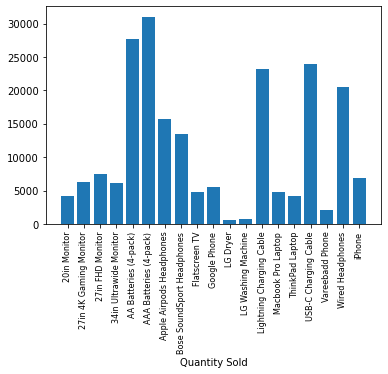

In [36]:
## Visualization
product=product_count["Product"]
plt.bar(product,product_count["Quantity Ordered"])
plt.xticks(product,rotation="vertical",size=8)
plt.xlabel("Products")
plt.xlabel("Quantity Sold")
plt.show() 
## AAA Batteries(4_pack) are most sold products. maybe because purchasement of electronic products got increased.